# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 16th May, 2025

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/14z3q91F8xzPb8Hm-KxNGn-nkKacqB17v?usp=drive_link
<h3><span style="color:red"> Deadline: 31st May, 2025 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [97]:
# Class definitions
class Book:
    def __init__(self, title, author, ISBN):
        self.title = title
        self.author = author
        self.ISBN = ISBN
        self.available = True  # Tracks availability

    def check_out(self):
        # Mark the book as unavailable
        self.available = False

    def check_in(self):
        # Mark the book as available
        self.available = True


class Patron:
    def __init__(self, name, patron_id):
        self.name = name
        self.patron_id = patron_id
        self.borrowed_books = []

    def borrow_book(self, book):
        # Add the book to the patron's borrowed list
        self.borrowed_books.append(book)

    def return_book(self, book):
        # Remove the book from the patron's borrowed list, if present
        if book in self.borrowed_books:
            self.borrowed_books.remove(book)


class Library:
    def __init__(self):
        self.books = []
        self.patrons = []

    def add_book(self, book):
        self.books.append(book)

    def add_patron(self, patron):
        self.patrons.append(patron)

    def lend_book(self, book, patron):
        # Check if the book is available and the patron exists in the library
        if book.available and patron in self.patrons:
            book.check_out()
            patron.borrow_book(book)
        else:
            print("Cannot lend the book: either it's unavailable or the patron is not registered.")

    def return_book(self, book, patron):
        # Check if the book is currently checked out
        if not book.available:
            book.check_in()  # Mark the book as available
            patron.return_book(book)  # Remove the book from the patron's borrowed list
        else:
            print("Book is already available. Nothing to return.")

In [98]:

# Create books
b1 = Book(title="The Silent Patient", author="Alex Michaelides", ISBN="9781250301697")
b2 = Book(title="Atomic Habits", author="James Clear", ISBN="9780735211292")

# Create patrons
p1 = Patron(name="Alice Johnson", patron_id="P1001")
p2 = Patron(name="Bob Smith", patron_id="P1002")

# Create a library and add books/patrons
lib = Library()
lib.add_book(b1)
lib.add_book(b2)
lib.add_patron(p1)
lib.add_patron(p2)

In [130]:
p2.borrowed_books

In [135]:
lib.lend_book(b1, p1)

In [136]:
# Test
for book in p1.borrowed_books:
    print(f"{book.title} is currently borrowed by {p1.name}")

Atomic Habits is currently borrowed by Alice Johnson
The Silent Patient is currently borrowed by Alice Johnson


In [119]:
lib.return_book(b1, p1)

In [114]:
lib.lend_book(b2, p2)

In [132]:
# Test
for book in p2.borrowed_books:
    print(f"{book.title} is currently borrowed by {p2.name}")

The Silent Patient is currently borrowed by Bob Smith


In [131]:
lib.return_book(b1, p2)

Book is already available. Nothing to return.


In [129]:
b2.available

True

## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [185]:
import math

class Shape():
    def __init__(self, name):
        self.name = name

    def area(self):
        raise NotImplementedError("Subclasses must implement area()")

    def perimeter(self):
        raise NotImplementedError("Subclasses must implement perimeter()")

# Child class
class Rectangle(Shape):
    def __init__(self, length, breadth):
        super().__init__("Rectangle")
        self.length = length
        self.breadth = breadth

    def area(self):
        return self.length * self.breadth

    def perimeter(self):
        return 2 * (self.length + self.breadth)

# Child class
class Circle(Shape):
    def __init__(self, radius):
        super().__init__("Circle")
        self.radius = radius

    def area(self):
        return math.pi * self.radius ** 2

    def perimeter(self):
        return 2 * math.pi * self.radius

In [186]:
r1 = Rectangle(10, 5)
print("Rectangle Area:", r1.area())
print("Rectangle Perimeter:", r1.perimeter())

c1 = Circle(7)
print("Circle Area:", c1.area())
print("Circle Perimeter:", c1.perimeter())

Rectangle Area: 50
Rectangle Perimeter: 30
Circle Area: 153.93804002589985
Circle Perimeter: 43.982297150257104


In [188]:
# show polymorphism
r1 = Rectangle(10, 5)
c1 = Circle(7)

shapes = [r1, c1]

for shape in shapes:
    print(f"{shape.name}:")
    print(f"  Area = {shape.area():.2f}")
    print(f"  Perimeter = {shape.perimeter():.2f}")

Rectangle:
  Area = 50.00
  Perimeter = 30.00
Circle:
  Area = 153.94
  Perimeter = 43.98


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [200]:
class Employee():
    def __init__(self, name, employee_id):
        self.name = name
        self.employee_id = employee_id
    
class SalariedEmployee(Employee):
    def __init__(self, name, employee_id, monthly_salary):
        super().__init__(name, employee_id)
        self.monthly_salary = monthly_salary

    def calculate_paycheck(self):
        return self.monthly_salary

class HourlyEmployee(Employee):
    def __init__(self, name, employee_id, hourly_rate, hours_worked):
        super().__init__(name, employee_id)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_paycheck(self):
        return self.hourly_rate * self.hours_worked

In [202]:
se = SalariedEmployee("Alice", "E1001", 5000)
he = HourlyEmployee("Bob", "E1002", hourly_rate=20, hours_worked=40)

print(f"{se.name}'s paycheck: ${se.calculate_paycheck()}")
print(f"{he.name}'s paycheck: ${he.calculate_paycheck()}")

Alice's paycheck: $5000
Bob's paycheck: $800


In [205]:
employees = [se, he]

for emp in employees:
    print(f"{emp.name}:")
    print(f"  Paycheck = {emp.calculate_paycheck():.2f}")

#Polymorphism:
# emp can be either a SalariedEmployee or HourlyEmployee
# we don’t care which one it is
# we just call calculate_paycheck(), and Python automatically uses the right version (method overriding in action!)

Alice:
  Paycheck = 5000.00
Bob:
  Paycheck = 800.00


## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

Evaluate at x = 2: 26
Derivative at x = 3: 42


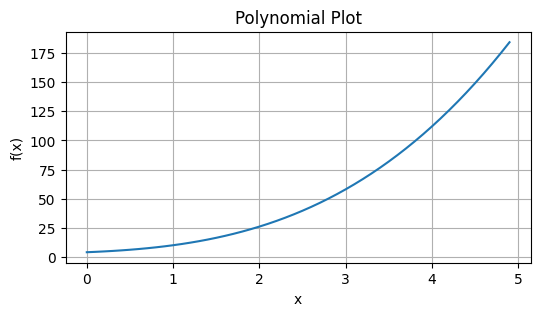

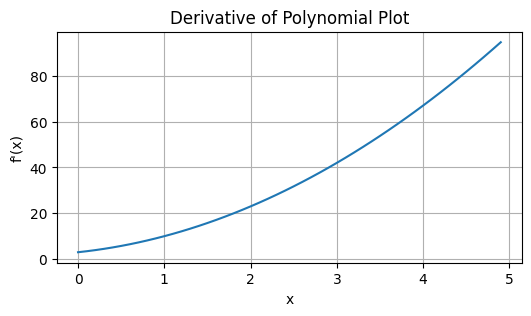

In [85]:
import numpy as np
import matplotlib.pyplot as plt

class Polynomial:
    def __init__(self, deg, coef=None):
        if coef is None:
            coef = []

        if deg >= 0:
            self.deg = deg
        else:
            raise ValueError("Please enter a valid positive integer for degree.")

        if len(coef) == deg + 1:
            self.coef = coef
        else:
            raise ValueError("Number of coefficients must be degree + 1.")

    def evaluate(self, x):
        result = 0
        for i, coefficient in enumerate(reversed(self.coef)):
            result += coefficient * (x ** i)
        return result

    def plot(self, x1, x2):
        fig, ax = plt.subplots(figsize=(6, 3))
        x = np.arange(x1, x2, 0.1)
        fx = [self.evaluate(val) for val in x]
        ax.plot(x, fx)
        ax.set_title("Polynomial Plot")
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        plt.grid(True)
        plt.show()

    def derivative(self, x):
        diff = 0
        for i, coef in enumerate(reversed(self.coef)):
            if i > 0:
                diff += coef * i * (x ** (i - 1))
        return diff

    def plot_derivative(self, x1, x2):
        fig, ax = plt.subplots(figsize=(6, 3))
        x = np.arange(x1, x2, 0.1)
        fx_d = [self.derivative(val) for val in x]
        ax.plot(x, fx_d)
        ax.set_title("Derivative of Polynomial Plot")
        ax.set_xlabel("x")
        ax.set_ylabel("f'(x)")
        plt.grid(True)
        plt.show()

# Example usage
if __name__ == "__main__":
    p1 = Polynomial(3, [1, 2, 3, 4])  # Represents 1x^3 + 2x^2 + 3x + 4
    print("Evaluate at x = 2:", p1.evaluate(2))
    print("Derivative at x = 3:", p1.derivative(3))
    p1.plot(0, 5)
    p1.plot_derivative(0, 5)

## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [150]:
class Product:
    def __init__(self, name, price):
        self.name = name 
        self.price = price

class ShoppingCart:
    def __init__(self):
        # list to store product objects
        self.items = []

    def add_item(self, product):
        self.items.append(product)

    def remove_item(self, product_name):
        # Loop to find the product by name
        for product in self.items:
            if product.name == product_name:
                self.items.remove(product)
                return
        print("Product isn't found in the cart")

    def calculate_total(self):
        total = 0
        for product in self.items:
            total += product.price
        return total
    
    # list all the products in the shopping cart
    def list_items(self):
        if not self.items:
            print("Your cart is empty.")
        else:
            print("Items in your cart:")
            for product in self.items:
                print(f"- {product.name}: ${product.price:.2f}")


In [159]:
p1 = Product("Book", 12.99)
p2 = Product("Pen", 2.49)
p3 = Product("Disk", 16.19)

cart = ShoppingCart()
cart.add_item(p1)
cart.add_item(p2)
cart.add_item(p3)

print("Total:", cart.calculate_total())  

cart.remove_item("Book")
print("Total after removal:", cart.calculate_total())  

# cart.remove_item("Pen")
# print("Total after removal:", cart.calculate_total())  

Total: 31.67
Total after removal: 18.68


In [160]:
cart.list_items()

Items in your cart:
- Pen: $2.49
- Disk: $16.19
